# Data Project - Stock Market Analysis 

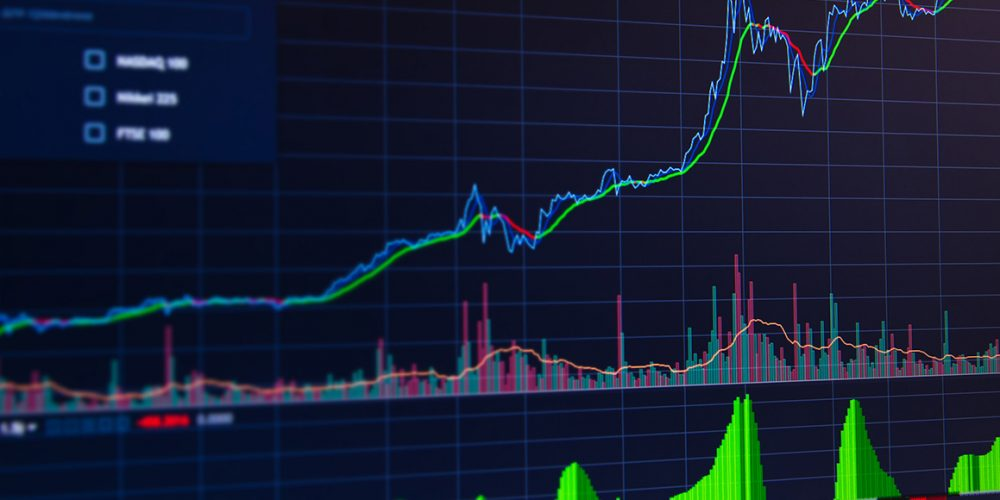

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)


# The tech stocks we'll use for this analysis
tech_list = ['NFLX', 'DIS', 'AAPL', 'GOOG', 'MSFT', 'META']
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Check if data is a DataFrame and calculate correlation
if isinstance(data, pd.DataFrame):
    correlation_matrix = data.corr()
    print(correlation_matrix)
else:
    print("Data is not a DataFrame.")

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [NFLX, DIS, AAPL, GOOG, MSFT, META]
company_name = ["NETFLIX", "DISNEY", "APPLE", "GOOGLE", "MICROSOFT", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Ticker      AAPL       DIS      GOOG      META      MSFT      NFLX
Ticker                                                            
AAPL    1.000000 -0.167778  0.765272  0.740904  0.824000  0.713060
DIS    -0.167778  1.000000  0.104435  0.171153  0.117576  0.126357
GOOG    0.765272  0.104435  1.000000  0.914387  0.926781  0.810123
META    0.740904  0.171153  0.914387  1.000000  0.976881  0.931057
MSFT    0.824000  0.117576  0.926781  0.976881  1.000000  0.926764
NFLX    0.713060  0.126357  0.810123  0.931057  0.926764  1.000000



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,NETFLIX
2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,NETFLIX
2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,NETFLIX
2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7191800,NETFLIX
2022-06-06,202.089996,203.869995,195.380005,197.139999,197.139999,5372000,NETFLIX
2022-06-07,194.869995,199.600006,193.000000,198.610001,198.610001,4839500,NETFLIX
2022-06-08,197.949997,207.380005,197.639999,202.830002,202.830002,7244100,NETFLIX
2022-06-09,200.649994,201.690002,192.539993,192.770004,192.770004,6949000,NETFLIX
2022-06-10,182.639999,185.860001,180.850006,182.940002,182.940002,13065600,NETFLIX


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [3]:
# Summary Stats
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,384.272196,390.171297,378.976528,384.723633,384.723633,7.193876e+06
std,128.446516,128.916298,127.709819,128.359855,128.359855,5.320357e+06
min,169.259995,172.059998,164.279999,167.539993,167.539993,1.404700e+06
25%,290.040009,297.619995,286.420013,291.500000,291.500000,3.879700e+06
50%,365.359985,372.010010,360.679993,365.929993,365.929993,5.778100e+06
75%,463.000000,470.649994,459.649994,465.910004,465.910004,8.328400e+06
max,647.140015,652.000000,643.030029,650.609985,650.609985,5.392030e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [4]:
# General info
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-05-31 to 2024-05-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

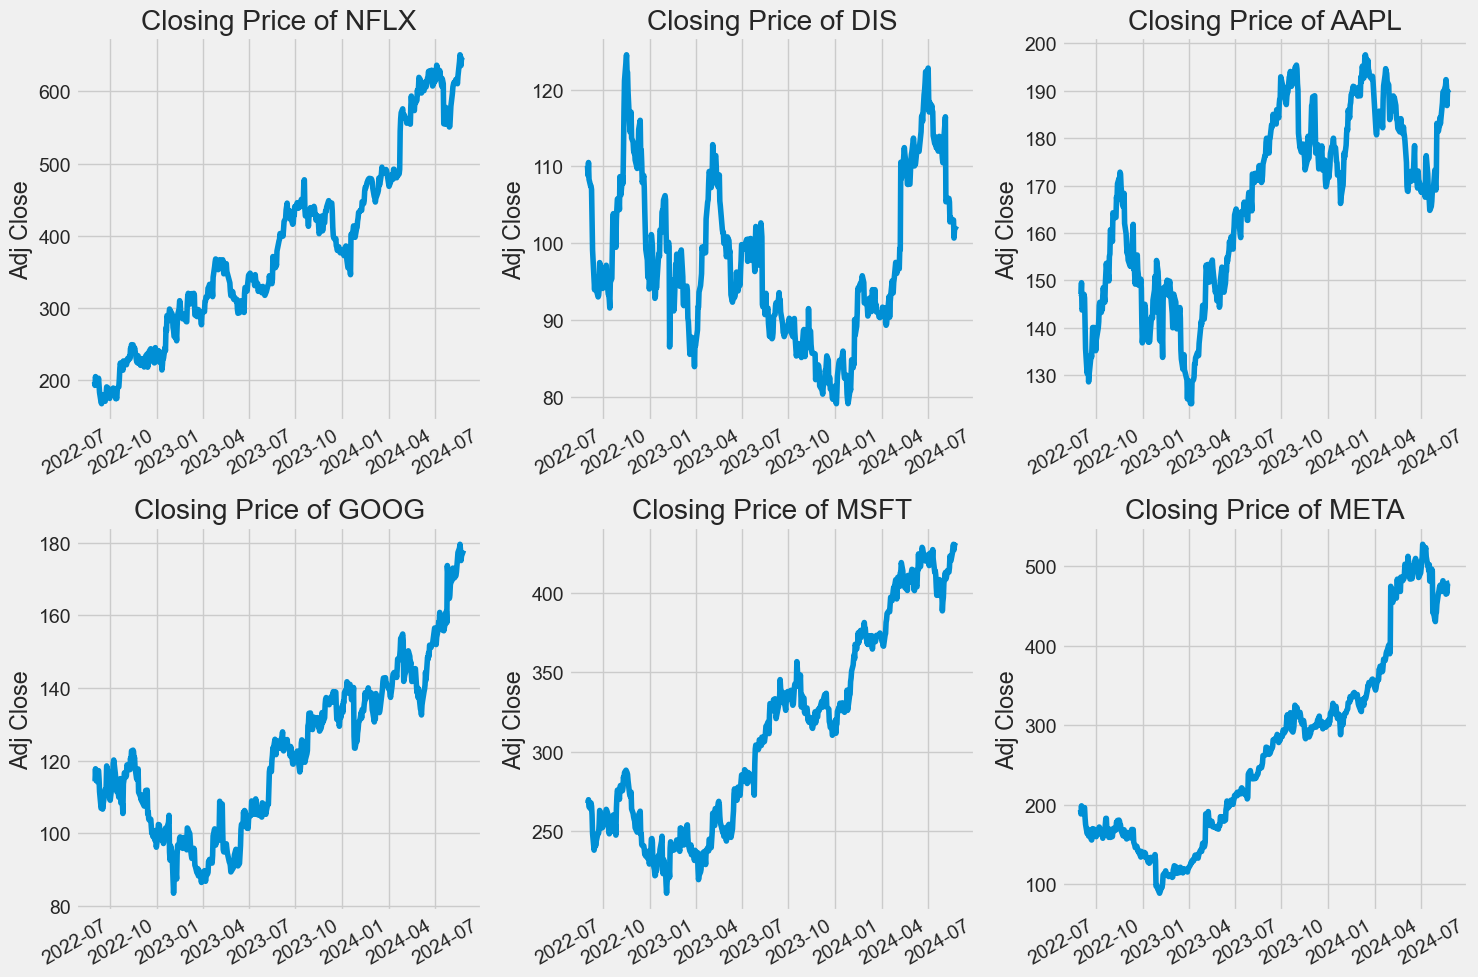

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

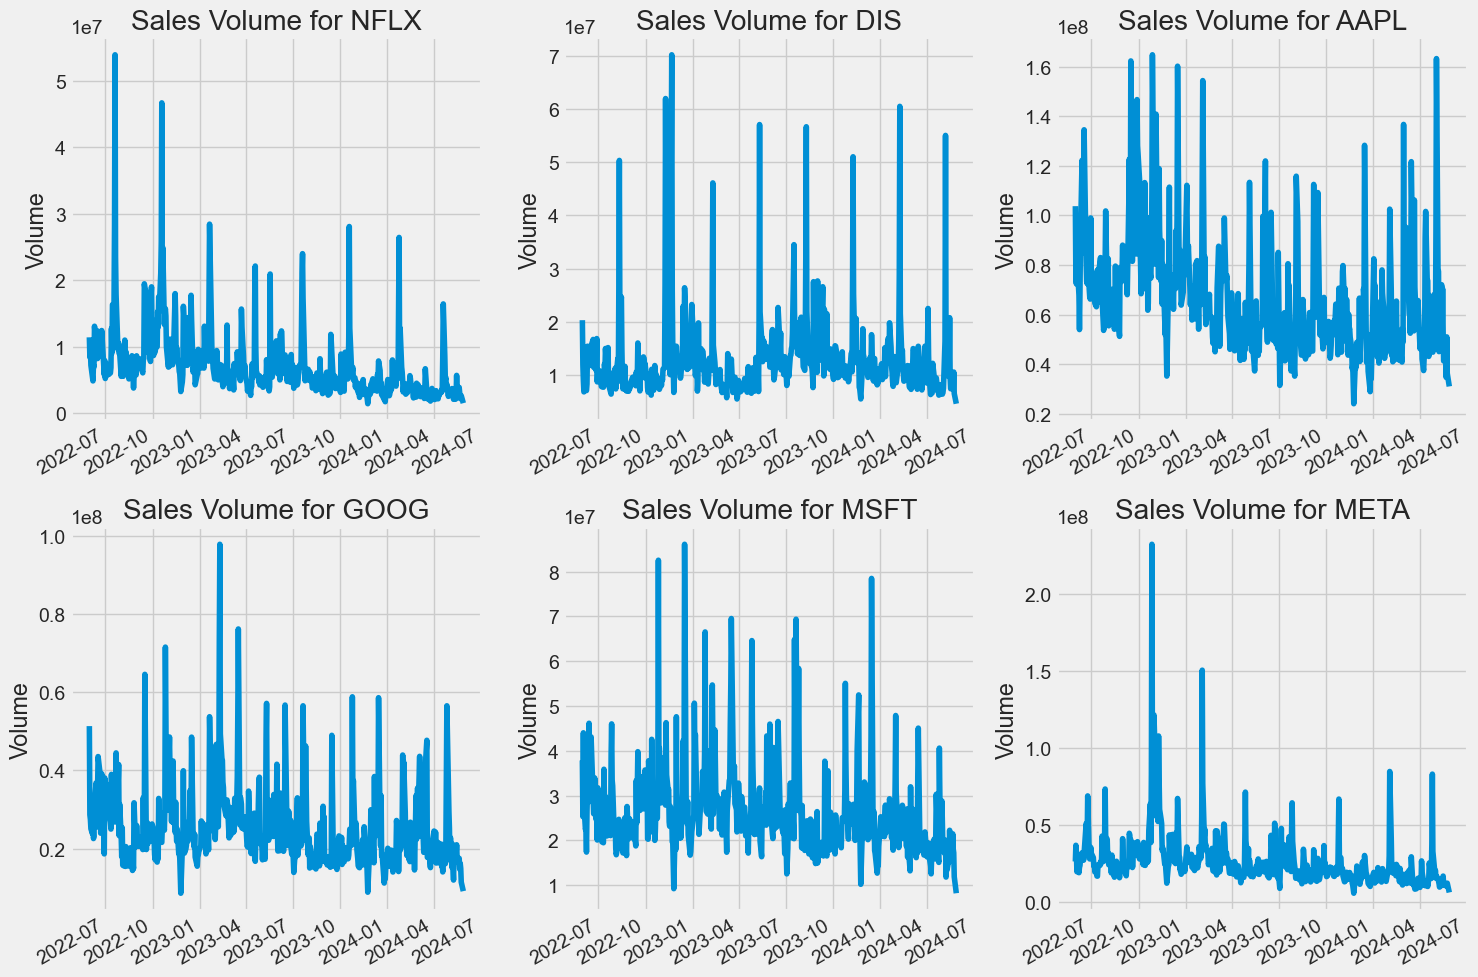

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

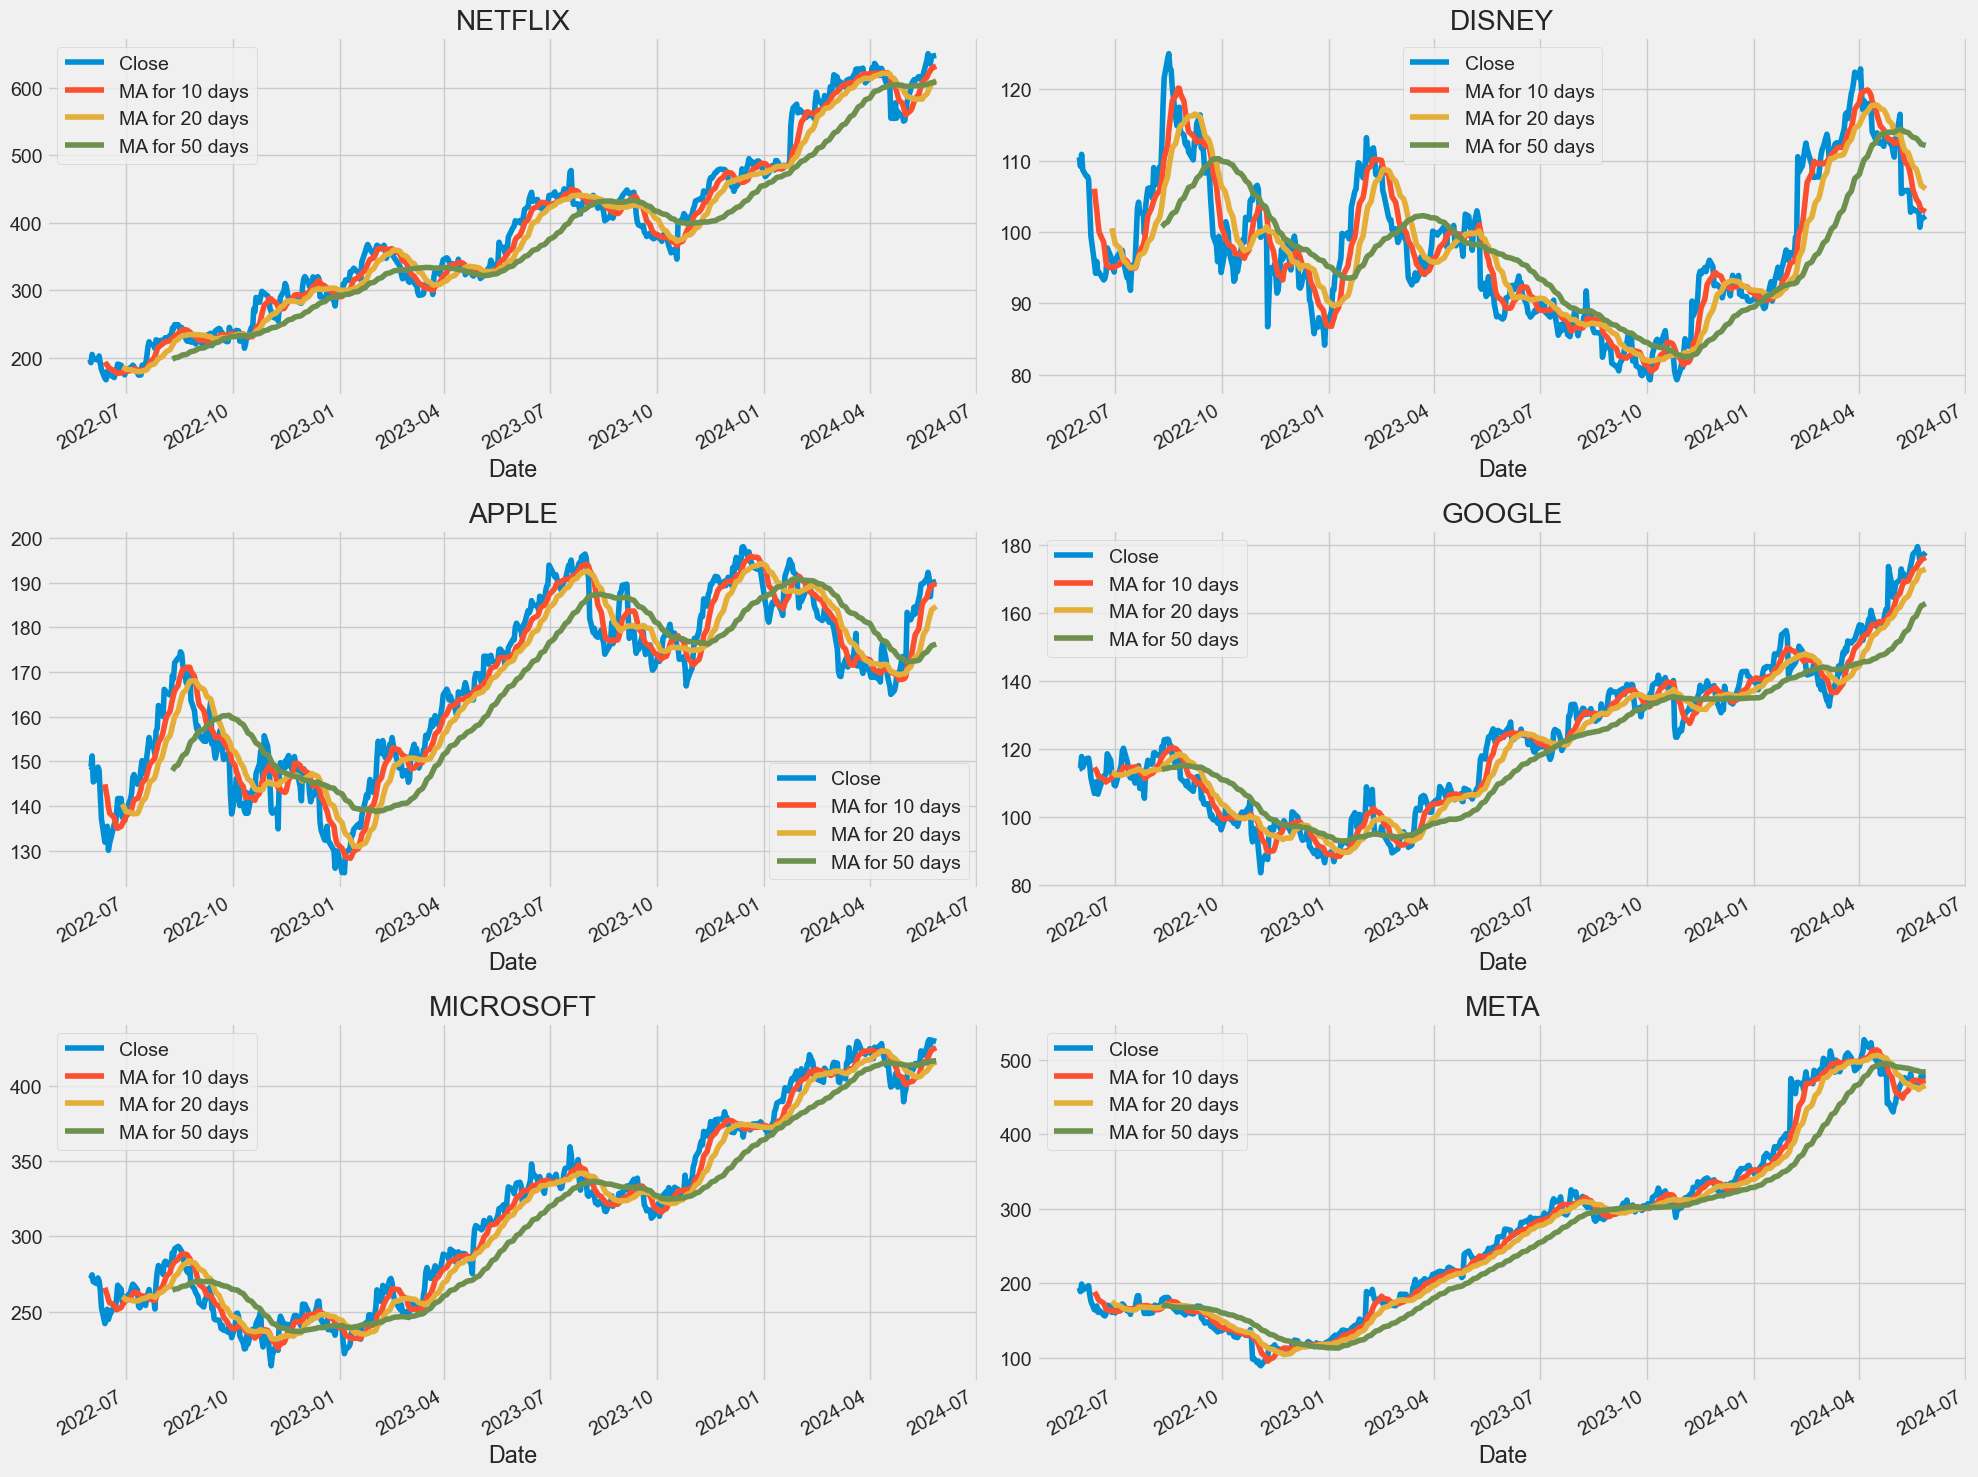

In [7]:
ma_day = [10, 20, 50]

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

for idx, (company, com_name) in enumerate(zip(company_list, company_name)):
    row = idx // 2
    col = idx % 2
    company[['Close']].plot(ax=axes[row, col], legend=True)  # Plot 'Close' line with legend
    
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()  # Assuming 'Close' is the column name for closing prices
        company[[column_name]].plot(ax=axes[row, col], legend=True)  # Plot moving average line with legend
    axes[row, col].set_title(com_name)

fig.tight_layout()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

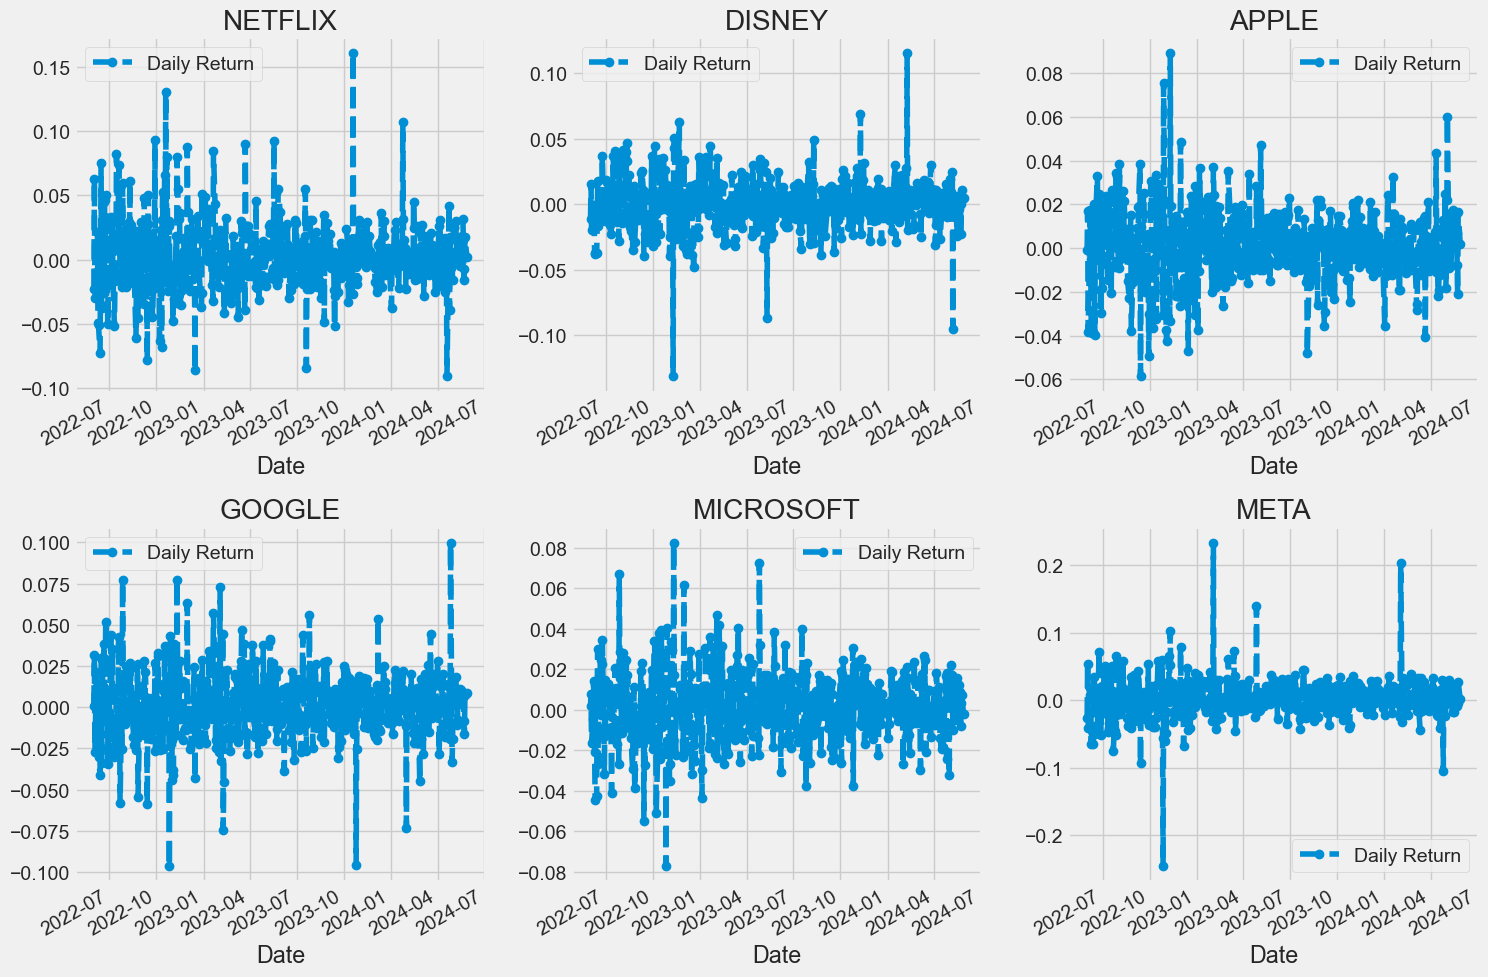

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()  # Assuming 'Close' is the column name for closing prices

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=3)  # Adjust the number of rows and columns based on the number of companies
fig.set_figheight(10)
fig.set_figwidth(15)

for idx, (company, com_name) in enumerate(zip(company_list, company_name)):
    row = idx // 3
    col = idx % 3
    company['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(com_name)

fig.tight_layout()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

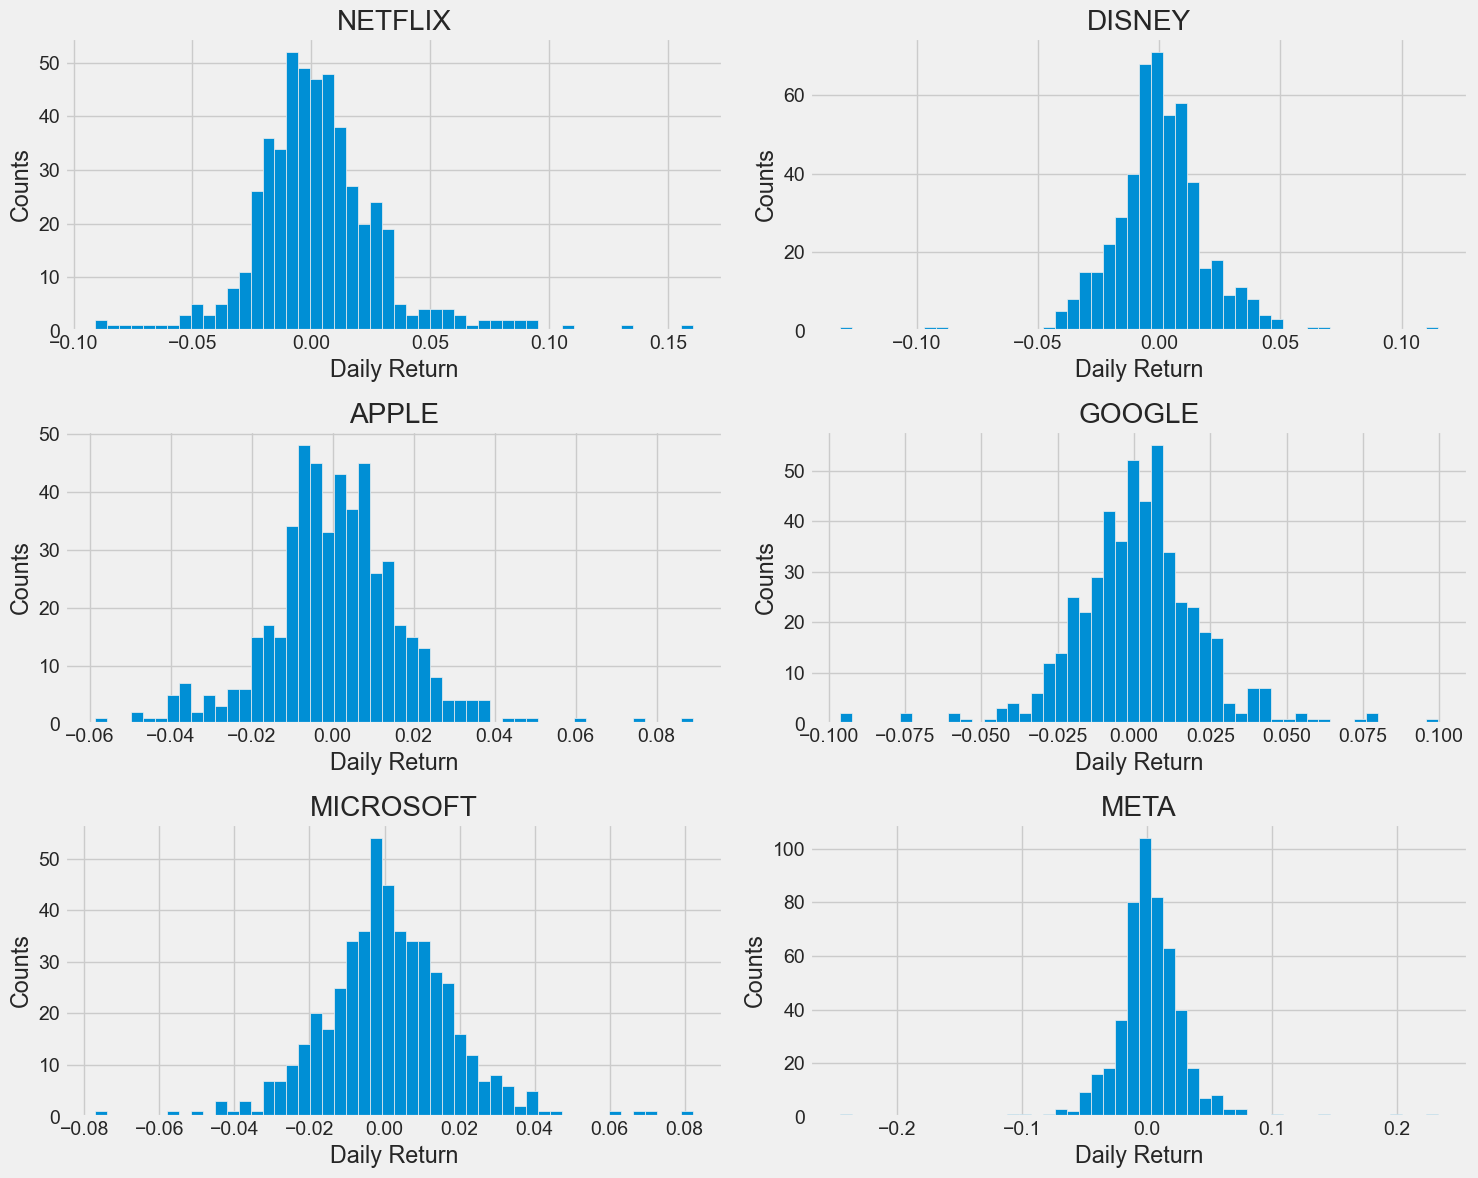

In [9]:
plt.figure(figsize=(15, 12))  # Adjusted figure size

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,DIS,GOOG,META,MSFT,NFLX
Date,,,,,,
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,-0.000873,-0.011318,0.000859,-0.025821,0.002023,-0.022944
2022-06-02,0.016811,0.015386,0.031620,0.054177,0.007929,0.063138
2022-06-03,-0.038555,-0.019843,-0.027024,-0.040632,-0.016607,-0.029792
2022-06-06,0.005227,-0.007730,0.021355,0.018188,-0.004703,-0.009247


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

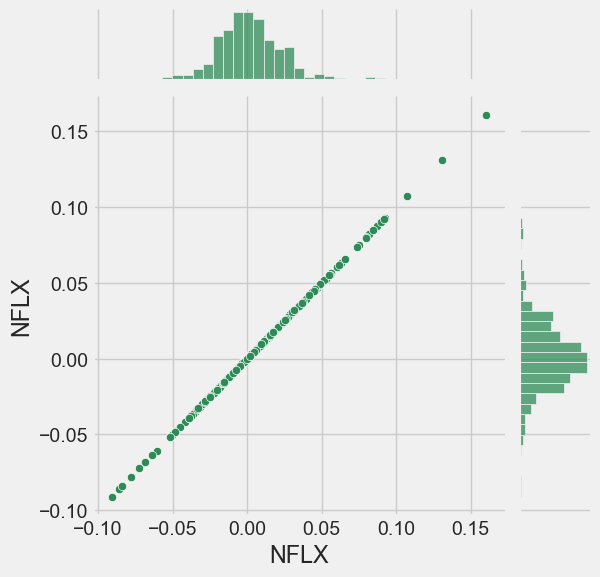

In [11]:
# Comparing Netflix to itself should show a perfectly linear relationship
sns.jointplot(x='NFLX', y='NFLX', data=tech_rets, kind='scatter', color='seagreen')

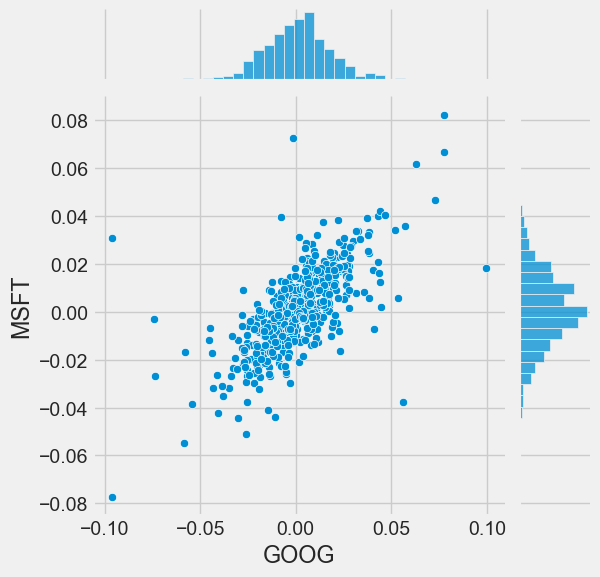

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

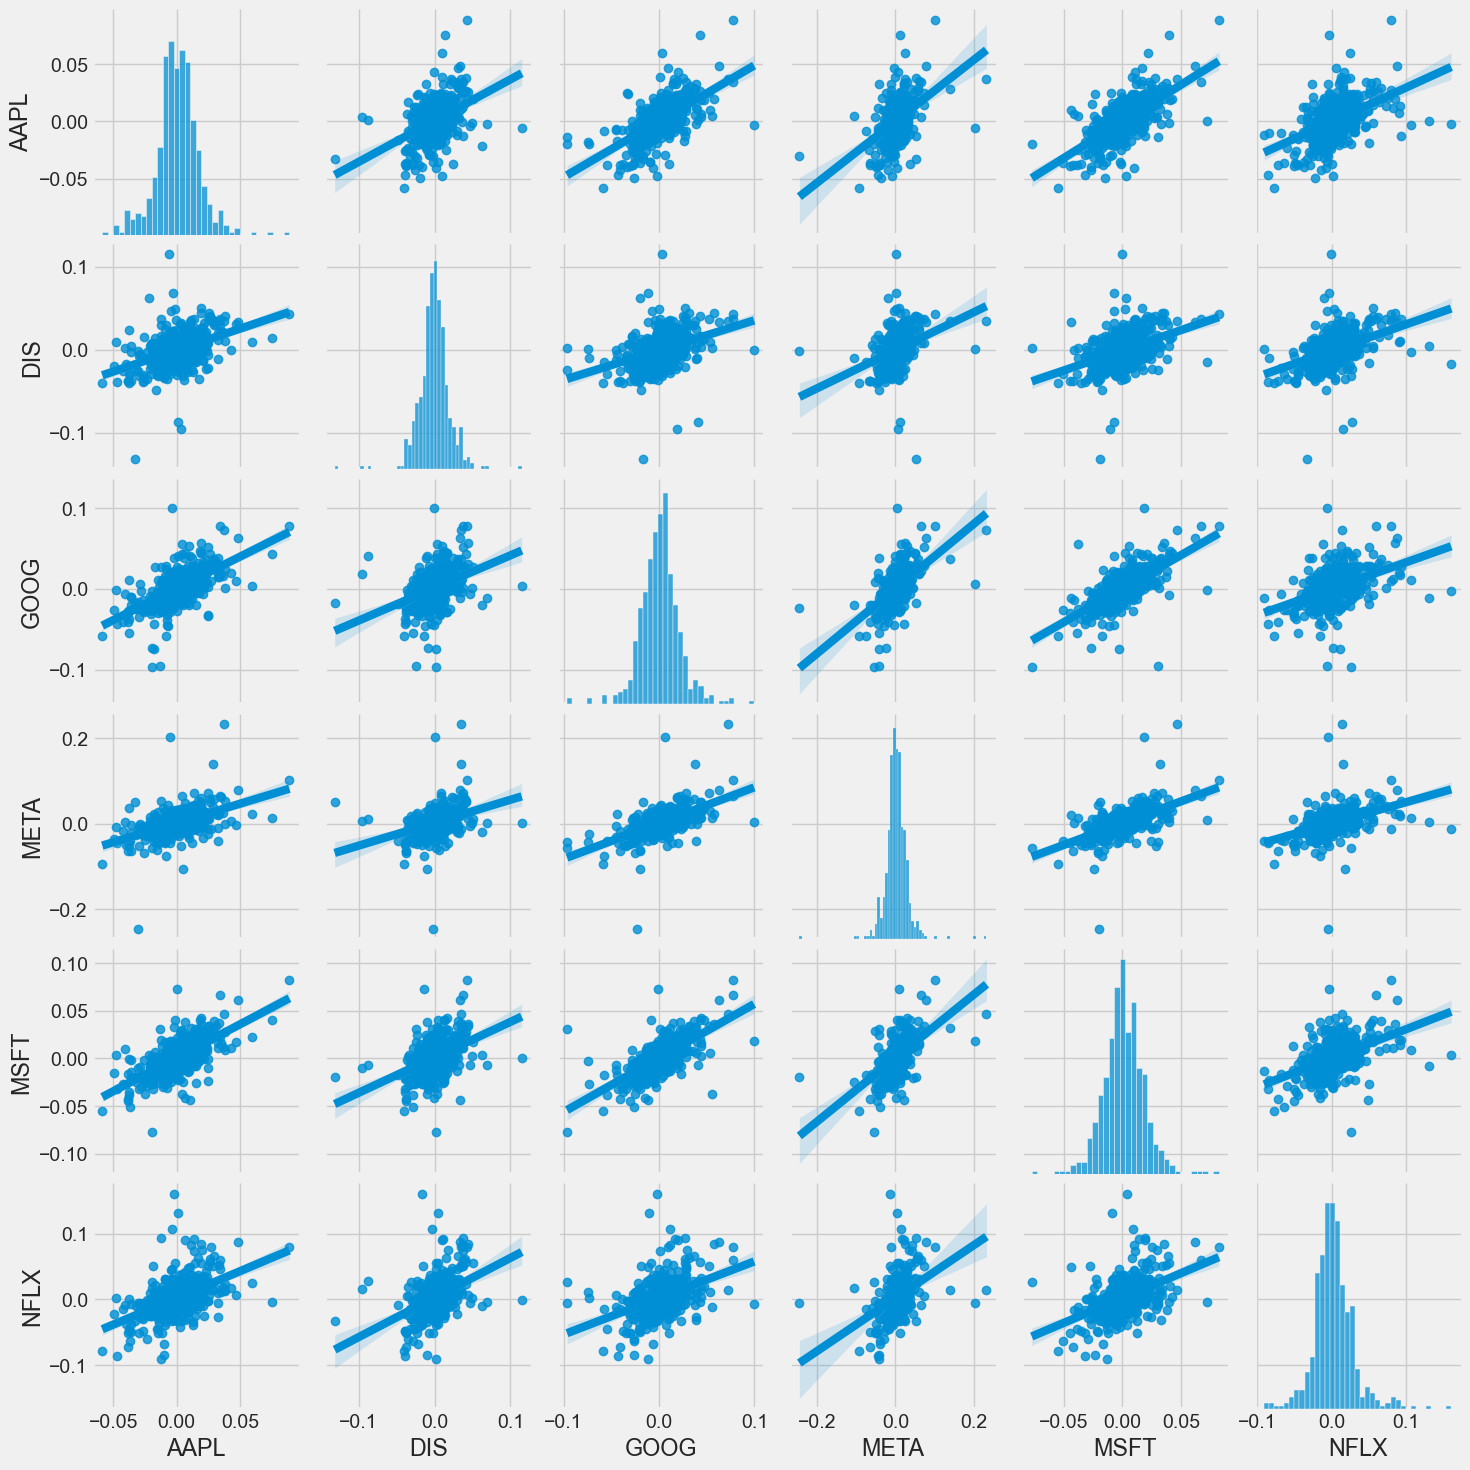

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Netflix and Meta, but also Netflix and Disney daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

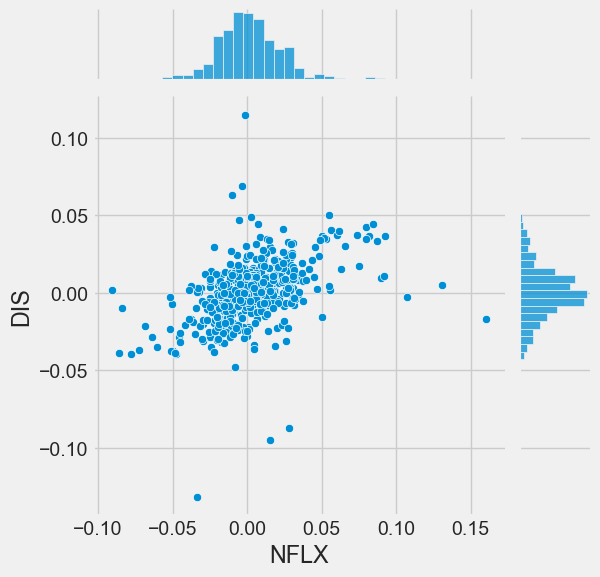

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='NFLX', y='DIS', data=tech_rets, kind='scatter')

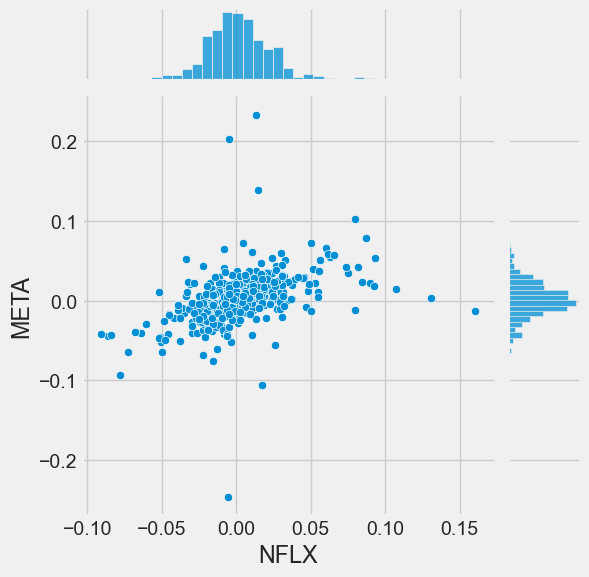

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='NFLX', y='META', data=tech_rets, kind='scatter')

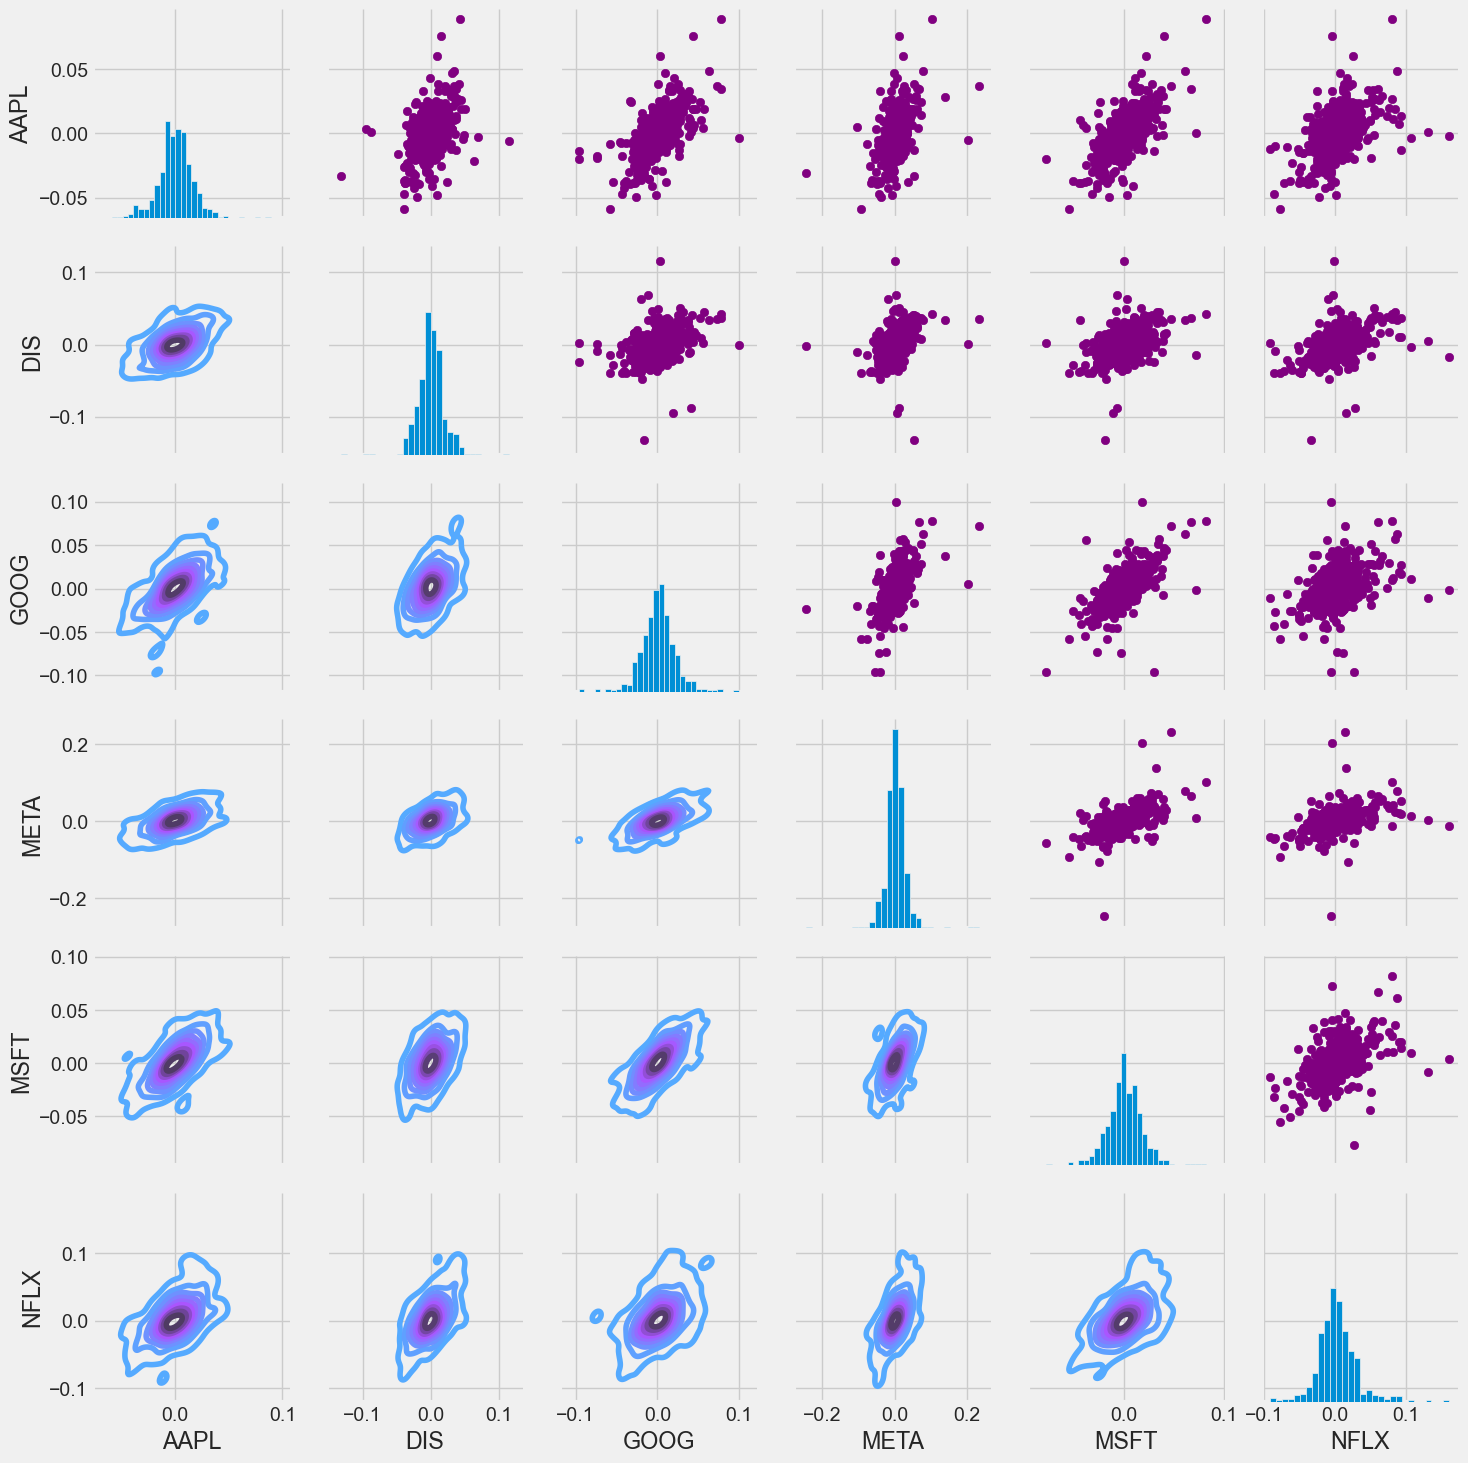

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

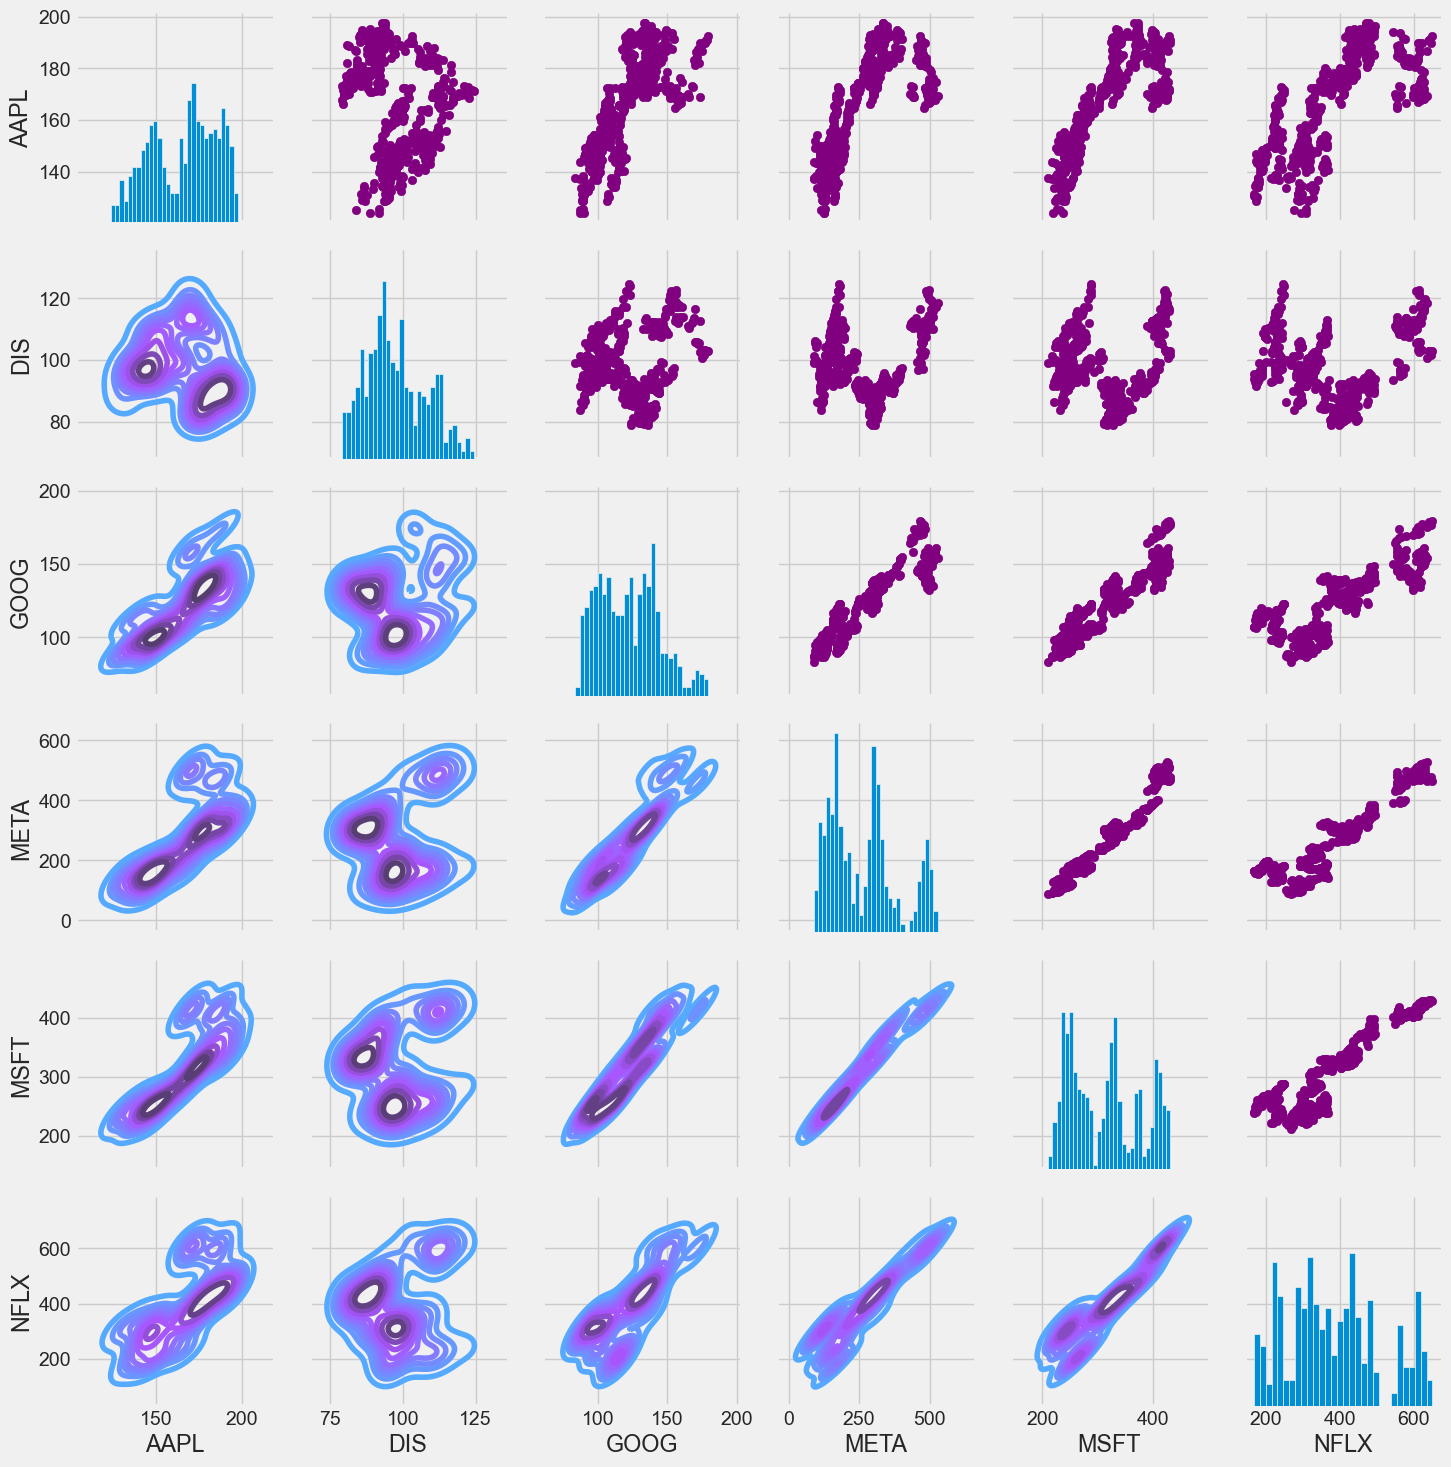

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

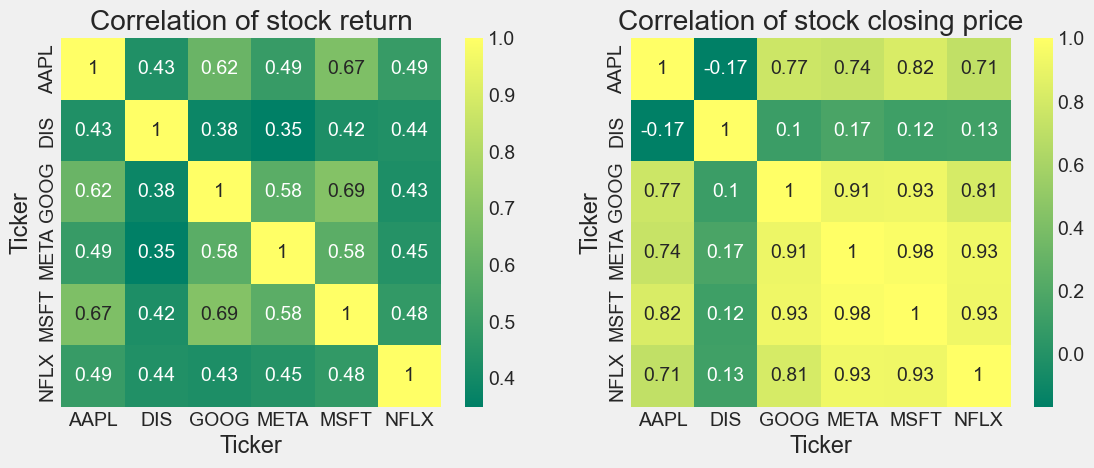

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Meta had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated. In contrast, Disney has very little correlations with them, even though it has a lot in common with Netflix, for example.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

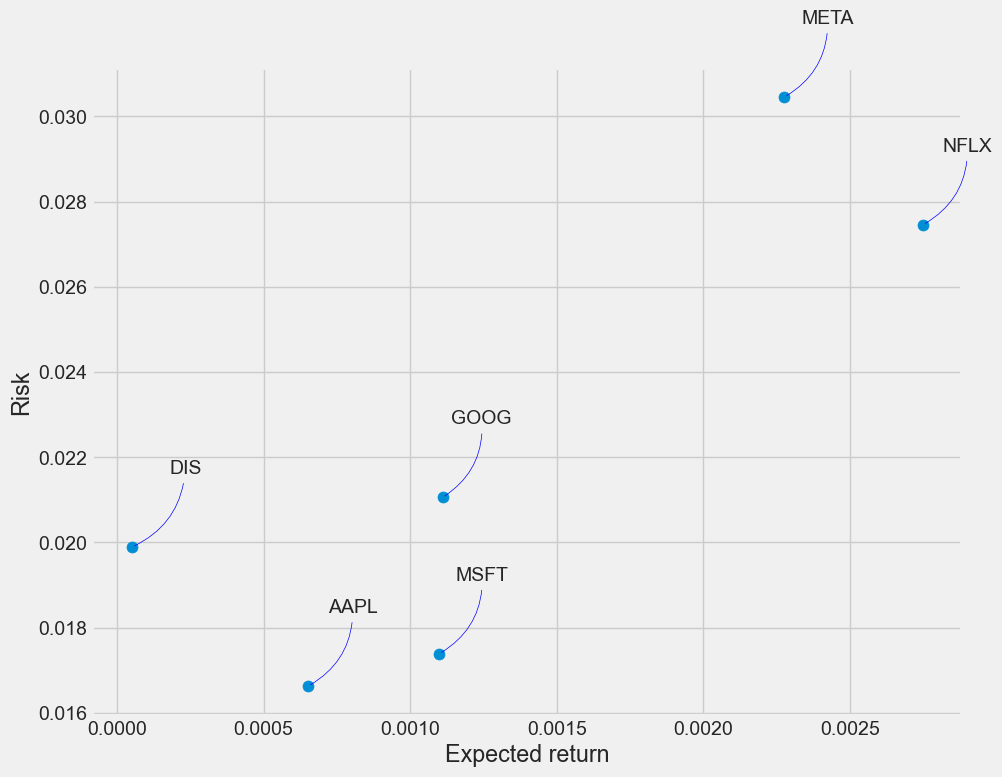

In [15]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of NFLX inc:

In [16]:
# Get the stock quote
df = pdr.get_data_yahoo('NFLX', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300
...,...,...,...,...,...,...
2024-05-21,636.760010,650.880005,634.219971,650.609985,650.609985,2920200
2024-05-22,647.140015,649.250000,638.119995,640.469971,640.469971,2176200
2024-05-23,642.340027,642.710022,630.000000,635.669983,635.669983,2313900


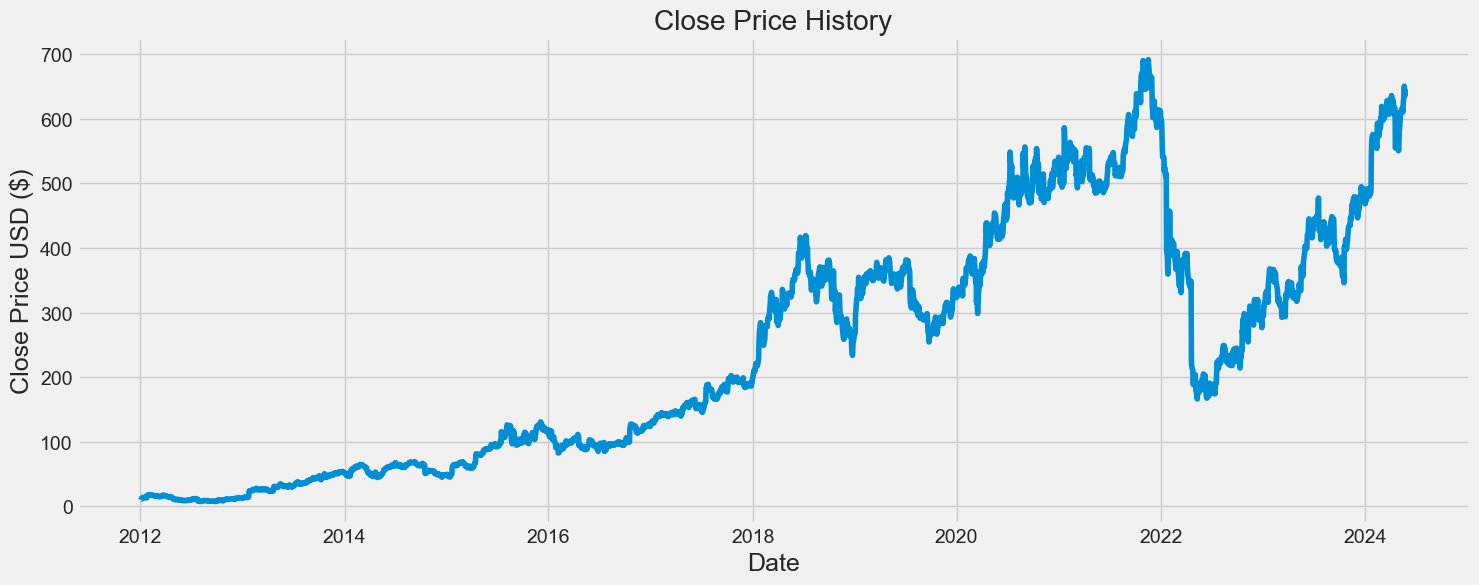

In [17]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import yfinance as yf

# Fetching the data
stock = 'NFLX'
start_date = '2012-01-01'
end_date = '2022-01-01'
df = yf.download(stock, start=start_date, end=end_date)

# Ensure that df has a proper DateTimeIndex
df.index = pd.to_datetime(df.index)

# Prepare data, assuming 'Close' column usage
data = df[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, sequence_length=60):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

# Define the training data length and split data
training_data_len = int(len(x) * 0.8)
x_train, y_train = x[:training_data_len], y[:training_data_len]
x_test, y_test = x[training_data_len:], y[training_data_len:]

# Adjusting indices for test data to get actual dates
test_dates = df.index[training_data_len+sequence_length:]

# Build and train LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

# Generate and prepare predictions
predictions = model.predict(x_test).flatten()

# Inverse scale predictions
predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Preparing train and valid DataFrames
train = pd.DataFrame(data.iloc[sequence_length:training_data_len + sequence_length], index=df.index[sequence_length:training_data_len + sequence_length])
valid = pd.DataFrame(data.iloc[training_data_len + sequence_length:], index=test_dates)
valid['Predictions'] = predictions_inverse


[*********************100%%**********************]  1 of 1 completed
D:\Program Files\anaconda 3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0015 - val_loss: 5.3787e-04
Epoch 2/5
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 3.1383e-04 - val_loss: 3.8594e-04
Epoch 3/5
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 1.9532e-04 - val_loss: 0.0030
Epoch 4/5
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 1.9832e-04 - val_loss: 0.0073
Epoch 5/5
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 2.3225e-04 - val_loss: 4.3333e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


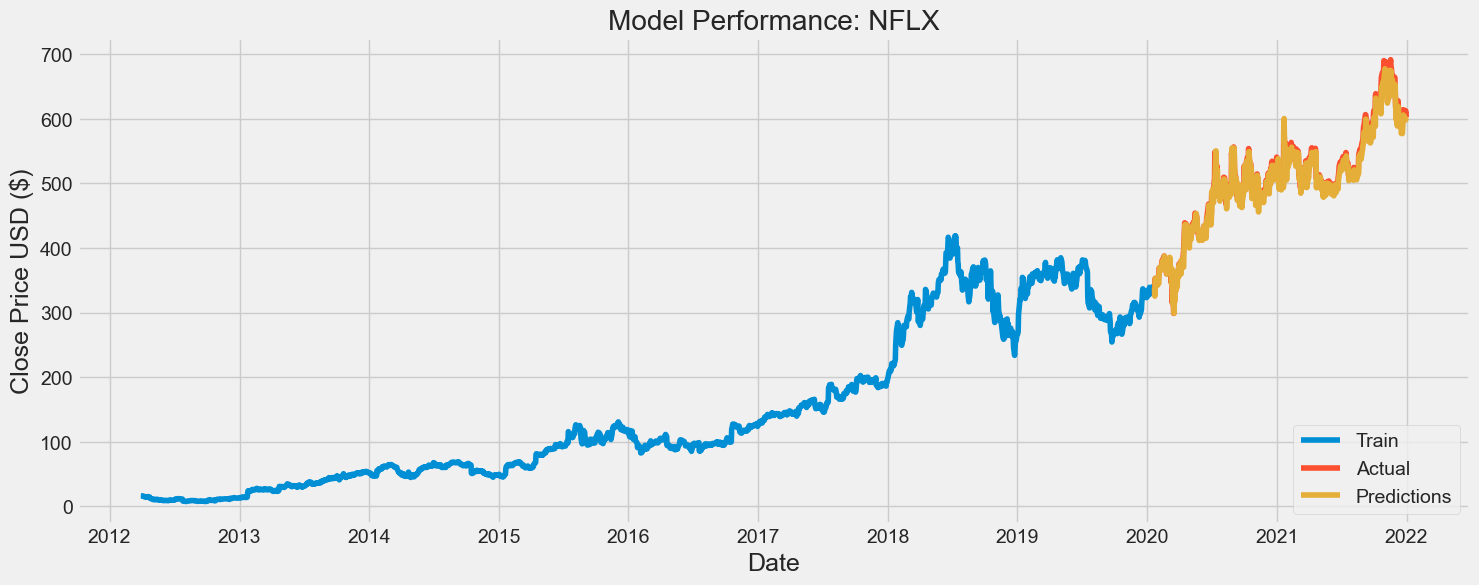

In [21]:
# Plotting the results
plt.figure(figsize=(16,6))
plt.title(f'Model Performance: {stock}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid.tail(40)

,Close,Predictions
Date,,
2021-11-04,668.400024,674.374268
2021-11-05,645.719971,644.239746
2021-11-08,651.450012,624.449219
2021-11-09,655.989990,640.767334
2021-11-10,646.909973,643.859436
2021-11-11,657.580017,630.658386
2021-11-12,682.609985,648.007507
2021-11-15,679.330017,675.299622
2021-11-16,687.400024,660.422791


In [26]:
import yfinance as yf
import pandas as pd

# Define the list of stock symbols including NFLX
tech_list = ['NFLX', 'AAPL', 'GOOG', 'MSFT', 'META']  # Example list

# Download stock data
data = yf.download(tech_list, start='2020-01-01', end='2022-01-01')['Adj Close']

# Check the DataFrame to ensure it has the correct columns
print(data.columns)


[*********************100%%**********************]  5 of 5 completed

Index(['AAPL', 'GOOG', 'META', 'MSFT', 'NFLX'], dtype='object', name='Ticker')


In [28]:
# Calculate correlations between the stocks
correlation_matrix = data.corr()
print(correlation_matrix)

# Select stocks with a high correlation with NFLX
high_corr_stocks = correlation_matrix['NFLX'].sort_values(ascending=False)
print(high_corr_stocks)



Ticker      AAPL      GOOG      META      MSFT      NFLX
Ticker                                                  
AAPL    1.000000  0.895666  0.915515  0.936714  0.891312
GOOG    0.895666  1.000000  0.920647  0.967981  0.804619
META    0.915515  0.920647  1.000000  0.904910  0.793976
MSFT    0.936714  0.967981  0.904910  1.000000  0.897511
NFLX    0.891312  0.804619  0.793976  0.897511  1.000000
Ticker
NFLX    1.000000
MSFT    0.897511
AAPL    0.891312
GOOG    0.804619
META    0.793976
Name: NFLX, dtype: float64


In [29]:
# Print the first few rows of the DataFrame to inspect
print(data.head())


Ticker           AAPL       GOOG        META        MSFT        NFLX
Date                                                                
2020-01-02  72.960457  68.368500  209.557648  154.215652  329.809998
2020-01-03  72.251137  68.032997  208.448837  152.295410  325.899994
2020-01-06  72.826851  69.710503  212.374680  152.689056  335.829987
2020-01-07  72.484352  69.667000  212.834183  151.296890  330.750000
2020-01-08  73.650352  70.216003  214.991898  153.706802  339.260010


In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the list of stock symbols
stocks = ['NFLX', 'AAPL', 'GOOG', 'MSFT', 'META']

# Download stock data
data = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate correlations
correlation_matrix = data.corr()
high_corr_stocks = correlation_matrix['NFLX'][correlation_matrix['NFLX'] > 0.5].index.tolist()
print("Highly correlated stocks:", high_corr_stocks)

# Filter data to include only the highly correlated stocks
model_data = data[high_corr_stocks]


[*********************100%%**********************]  5 of 5 completed

Highly correlated stocks: ['META', 'NFLX']


In [45]:
# Assuming 'NFLX' is the target and it is included in your model_data
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_feature = model_data[['NFLX']]
target_scaler.fit(target_feature)

# Scale all data for training
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(model_data)

# Function to create sequences
def create_sequences(input_data, target_column, sequence_length=60):
    x, y = [], []
    for i in range(sequence_length, len(input_data)):
        x.append(input_data[i - sequence_length:i])
        y.append(input_data[i, target_column])
    return np.array(x), np.array(y)

# Assuming NFLX is the target and is at index 0
x, y = create_sequences(scaled_data, target_column=high_corr_stocks.index('NFLX'))


In [46]:
# Split the data
train_size = int(0.8 * len(x))
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]


In [47]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20


D:\Program Files\anaconda 3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1555 - val_loss: 0.0086
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0163 - val_loss: 0.0095
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0110 - val_loss: 0.0065
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0033 - val_l

In [49]:
# Make predictions
predictions = model.predict(x_test)
print(predictions)
predictions = scaler.inverse_transform(predictions)  # Assuming NFLX is the first column in the scaler

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+60:], y_test, label='Actual NFLX Price')
plt.plot(data.index[train_size+60:], predictions, label='Predicted NFLX Price', color='red')
plt.title('NFLX Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[0.05817575]
 [0.05611606]
 [0.05220217]
 [0.04824504]
 [0.04391437]
 [0.03971723]
 [0.03544632]
 [0.03201579]
 [0.02964335]
 [0.02895363]
 [0.02936849]
 [0.02970656]
 [0.0298292 ]
 [0.02946492]
 [0.02917657]
 [0.02948344]
 [0.03005604]
 [0.03121891]
 [0.03255605]
 [0.03310995]
 [0.0327999 ]
 [0.0320522 ]
 [0.03087546]
 [0.03069178]
 [0.03145185]
 [0.03379982]
 [0.03850236]
 [0.04538377]
 [0.05324717]
 [0.06131054]
 [0.06874412]
 [0.07652955]
 [0.08414607]
 [0.09118579]
 [0.09760024]
 [0.10281368]
 [0.10736879]
 [0.11148846]
 [0.11478462]
 [0.11793797]
 [0.12051427]
 [0.12385923]
 [0.12747172]
 [0.13171184]
 [0.13618226]
 [0.14027028]
 [0.1434386 ]
 [0.1461546 ]
 [0.1480379 ]
 [0.14785713]
 [0.14600082]
 [0.14349136]
 [0.1410411 ]
 [0.13775462]
 [0.13414295]
 [0.130121  ]
 [0.12627271]
 [0.12333067]
 [0.1208239 ]
 [0.1180438 ]
 [0.11616985]
 [0.11490995]
 [0.11471496]
 [0.11556021]
 [0.11541346]
 [0.11510968]
 [0.11578012]
 [0.11761707]
 [0.120585

ValueError: non-broadcastable output operand with shape (140,1) doesn't match the broadcast shape (140,2)

[*********************100%%**********************]  5 of 5 completed

Epoch 1/5



D:\Program Files\anaconda 3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0144 - val_loss: 0.0052
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.8442e-04 - val_loss: 0.0020
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


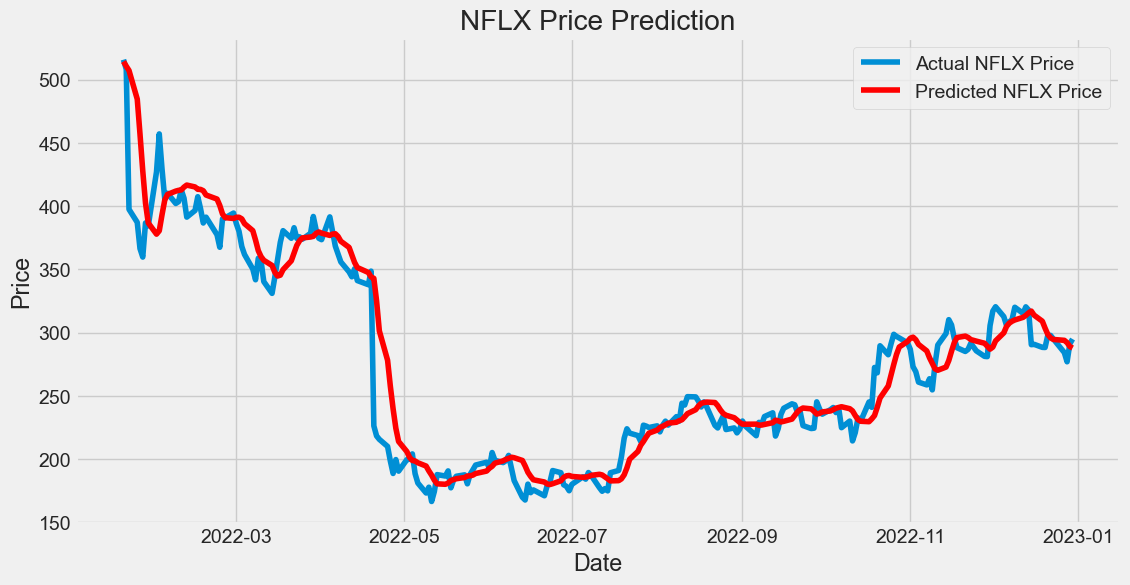

In [52]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Download and prepare data
stocks = ['NFLX', 'AAPL', 'GOOG', 'MSFT', 'META']
data = yf.download(stocks, start='2018-01-01', end='2023-01-01')['Adj Close']
correlation_matrix = data.corr()
high_corr_stocks = correlation_matrix['NFLX'][correlation_matrix['NFLX'] > 0.5].index.tolist()
model_data = data[high_corr_stocks]

# Separate scaler for the target feature
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(model_data[['NFLX']])

# General scaler for all features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(model_data)

# Prepare data and model
x, y = create_sequences(scaled_data, target_column=model_data.columns.get_loc('NFLX'), sequence_length=60)
train_size = int(0.8 * len(x))
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=4, validation_data=(x_test, y_test))

# Predict and inverse transform
predictions = model.predict(x_test)
predictions = target_scaler.inverse_transform(predictions)  # Correct scaling

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+60:], data['NFLX'].iloc[train_size+60:], label='Actual NFLX Price')
plt.plot(data.index[train_size+60:], predictions, label='Predicted NFLX Price', color='red')
plt.title('NFLX Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [53]:
print(predictions)

[[514.41833]
 [510.68637]
 [507.31332]
 [484.64835]
 [456.91092]
 [427.9671 ]
 [402.36813]
 [386.716  ]
 [377.85703]
 [380.4895 ]
 [393.18094]
 [404.8359 ]
 [409.25946]
 [411.8967 ]
 [412.48843]
 [412.81848]
 [415.06067]
 [416.67102]
 [415.18542]
 [413.32104]
 [413.24606]
 [412.20825]
 [408.8174 ]
 [405.58868]
 [400.5192 ]
 [393.7346 ]
 [390.90485]
 [390.24197]
 [391.19888]
 [391.2053 ]
 [389.938  ]
 [386.1229 ]
 [380.62872]
 [373.13092]
 [364.77762]
 [360.04117]
 [357.17685]
 [353.0703 ]
 [347.76242]
 [344.73087]
 [345.40466]
 [349.7717 ]
 [356.77628]
 [362.83725]
 [368.96085]
 [372.63046]
 [374.8559 ]
 [375.58612]
 [376.0951 ]
 [378.50333]
 [379.5558 ]
 [378.6233 ]
 [376.8402 ]
 [377.91882]
 [378.15137]
 [375.99344]
 [372.2351 ]
 [367.36984]
 [361.4622 ]
 [355.47464]
 [351.44025]
 [347.5232 ]
 [343.96344]
 [342.89478]
 [324.98856]
 [301.3291 ]
 [278.0513 ]
 [257.538  ]
 [239.67038]
 [224.3184 ]
 [213.83437]
 [205.86499]
 [201.22166]
 [198.82051]
 [198.38945]
 [196.99547]
 [194.39752]